# Redes complexas para marcação de contorno

In [1]:
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from skimage import io

## Definimos uma função que vai criar o grafo da image

In [2]:
#Cada um dos pixels se tornará um nódulo ou vértice do grafo
def create_graph_from_image(image):
    rows, cols = image.shape
    G = nx.Graph()

    for r in range(rows):
        for c in range(cols):
            G.add_node((r, c), intensity=image[r, c])
            if r > 0:
                G.add_edge((r, c), (r-1, c), weight=abs(int(image[r, c]) - int(image[r-1, c])))
            if c > 0:
                G.add_edge((r, c), (r, c-1), weight=abs(int(image[r, c]) - int(image[r, c-1])))
            if r > 0 and c > 0:
                G.add_edge((r, c), (r-1, c-1), weight=abs(int(image[r, c]) - int(image[r-1, c-1])))
            if r > 0 and c < cols-1:
                G.add_edge((r, c), (r-1, c+1), weight=abs(int(image[r, c]) - int(image[r-1, c+1])))
    return G

## Função que acha os pixels na borda

In [3]:
#Esta função utilizará os pesos encontrados na função anterior ao formar as arestas do grafo e irá comparar com um threshold que determinará se será considerada borda

def find_borders(G, threshold):
    edges = []
    for (u, v, d) in G.edges(data=True):
        if d['weight'] > threshold:
            edges.append((u, v))
    return edges


## Função de desenhar borda

In [4]:
#Irá tranformar o valor de todos os pixels na borda para a cor branca
def draw_borders(image, edges):
    for (u, v) in edges:
        image[u] = 255
        image[v] = 255
    return image


## Importação da imagem

In [5]:
#Aqui importamos a imagem e a tornamos preto e branco por simplicidade e por velocidade de processamento
lenna_path = 'imagens_teste/lenna.png'
lenna_cor = cv2.imread(lenna_path)
lenna = cv2.imread(lenna_path, cv2.IMREAD_GRAYSCALE)
jupiter_path = 'imagens_teste/Jupiter.bmp'
jupiter_cor = cv2.imread(jupiter_path)
jupiter = cv2.imread(jupiter_path,cv2.IMREAD_GRAYSCALE)
baboon_path = 'imagens_teste/baboon.tiff'
baboon_cor = cv2.imread(baboon_path)
baboon = cv2.imread(baboon_path,cv2.IMREAD_GRAYSCALE)
folhas_path = 'imagens_teste/folhas.png'
folhas_cor = cv2.imread(folhas_path)
folhas = cv2.imread(folhas_path,cv2.IMREAD_GRAYSCALE)
folhas_cortada_path = 'imagens_teste/folhas-cortada.png'
folhas_cortada_cor = cv2.imread(folhas_cortada_path)
folhas_cortada = cv2.imread(folhas_cortada_path,cv2.IMREAD_GRAYSCALE)
folhinha_path = 'imagens_teste/folha-low.jpg'
folhinha_cor = cv2.imread(folhinha_path)
folhinha = cv2.imread(folhinha_path,cv2.IMREAD_GRAYSCALE)
roubo_path = 'imagens_teste/roubo.webp'
roubo_cor = cv2.imread(roubo_path)
roubo = cv2.imread(roubo_path,cv2.IMREAD_GRAYSCALE)

#Outro truque que pode-se usar para diminuir o tempo de propcessamento é diminuir a quantidade de pixels da imagem
#image = cv2.resize(image, (100, 100))

## Invocação das funções

In [6]:
G1 = create_graph_from_image(lenna)

edges = find_borders(G1,30)

border_lenna = np.zeros_like(lenna)
border_lenna = draw_borders(border_lenna, edges)

In [7]:
G2 = create_graph_from_image(jupiter)

edges = find_borders(G2,30)

border_jupiter = np.zeros_like(jupiter)
border_jupiter = draw_borders(border_jupiter, edges)

In [8]:
G3 = create_graph_from_image(baboon)

edges = find_borders(G3,30)

border_baboon = np.zeros_like(baboon)
border_baboon = draw_borders(border_baboon, edges)

In [9]:
G4 = create_graph_from_image(folhas)

edges = find_borders(G4,30)

border_folhas = np.zeros_like(folhas)
border_folhas = draw_borders(border_folhas, edges)

In [10]:
G5 = create_graph_from_image(folhas_cortada)

edges = find_borders(G5,30)

border_cortada = np.zeros_like(folhas_cortada)
border_cortada = draw_borders(border_cortada, edges)

In [11]:
G6 = create_graph_from_image(folhinha)

edges = find_borders(G6,30)

border_folhinha = np.zeros_like(folhinha)
border_folhinha = draw_borders(border_folhinha, edges)

## Plotting the image

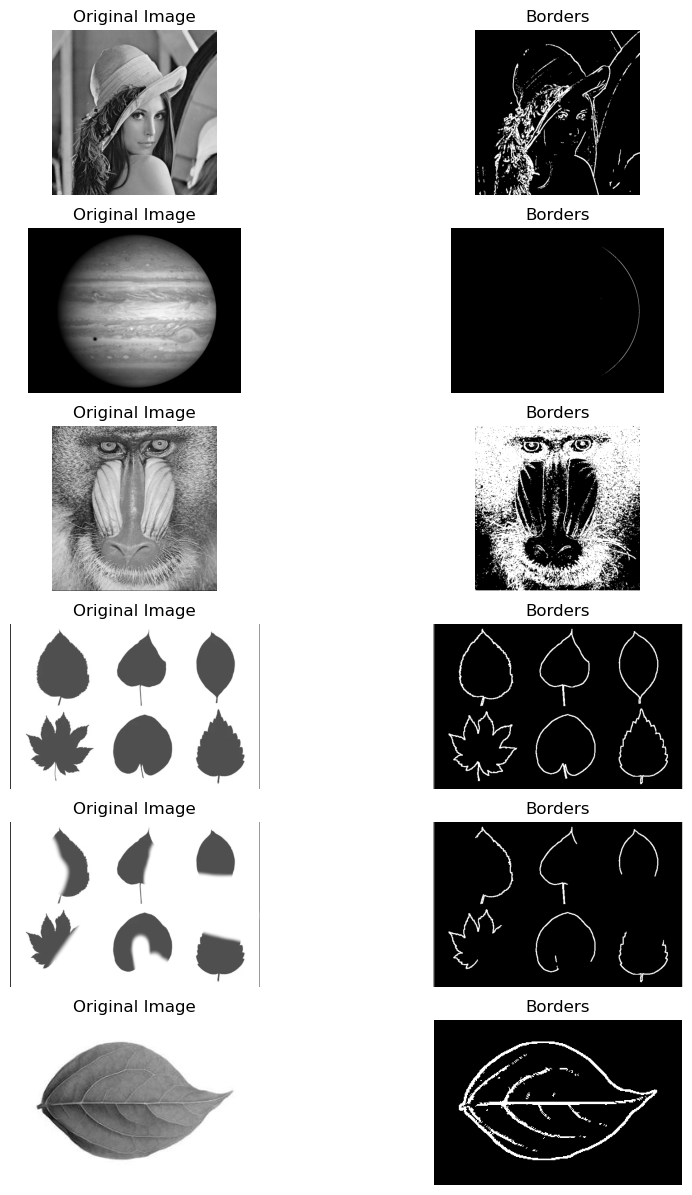

In [12]:

plt.figure(figsize=(10, 15))
plt.subplot(6, 2, 1)
plt.title('Original Image')
plt.imshow(lenna, cmap='gray')
plt.axis('off')
plt.subplot(6, 2, 2)
plt.title('Borders')
plt.imshow(border_lenna, cmap='gray')
plt.axis('off')
plt.savefig("bordas.jpg")
plt.subplot(6, 2, 3)
plt.title('Original Image')
plt.imshow(jupiter, cmap='gray')
plt.axis('off')
plt.subplot(6, 2, 4)
plt.title('Borders')
plt.imshow(border_jupiter, cmap='gray')
plt.axis('off')
plt.savefig("bordas.jpg")
plt.subplot(6, 2, 5)
plt.title('Original Image')
plt.imshow(baboon, cmap='gray')
plt.axis('off')
plt.subplot(6, 2, 6)
plt.title('Borders')
plt.imshow(border_baboon, cmap='gray')
plt.axis('off')
plt.subplot(6, 2, 7)
plt.title('Original Image')
plt.imshow(folhas, cmap='gray')
plt.axis('off')
plt.subplot(6, 2, 8)
plt.title('Borders')
plt.imshow(border_folhas, cmap='gray')
plt.axis('off')
plt.subplot(6, 2, 9)
plt.title('Original Image')
plt.imshow(folhas_cortada, cmap='gray')
plt.axis('off')
plt.subplot(6, 2, 10)
plt.title('Borders')
plt.imshow(border_cortada, cmap='gray')
plt.axis('off')
plt.subplot(6, 2, 11)
plt.title('Original Image')
plt.imshow(folhinha, cmap='gray')
plt.axis('off')
plt.subplot(6, 2, 12)
plt.title('Borders')
plt.imshow(border_folhinha, cmap='gray')
plt.axis('off')

plt.savefig("bordas.jpg")

plt.show()


# Rede complexa com conexão de todos os pontos

In [13]:
def create_fully_connected_graph_from_image(image):
    rows, cols = image.shape
    G = nx.Graph()
    
    # Add all pixels as nodes
    for r in range(rows):
        for c in range(cols):
            G.add_node((r, c), intensity=image[r, c])
    
    # Connect each pixel to all other pixels
    for r1 in range(rows):
        for c1 in range(cols):
            for r2 in range(rows):
                for c2 in range(cols):
                    if (r1, c1) != (r2, c2):
                        weight = abs(int(image[r1, c1]) - int(image[r2, c2]))
                        G.add_edge((r1, c1), (r2, c2), weight=weight)
    
    return G


In [14]:
#Impossível rodar, extremamente pesado

#G = create_fully_connected_graph_from_image(image)

#edges = find_borders(G)

#border_image = np.zeros_like(image)
#border_image = draw_borders(border_image, edges)


# Aplicando método Otsu

## Criando o threshold por Otsu

In [15]:
def otsu_thresholding(img):
    mean_gray = np.mean(img)
    var = np.zeros(256)

    for t in range(256):
        # computing class probability (background and foreground)
        pb = img[img<t].size
        wb = pb/img.size
        wf = 1-wb

        if wb != 0 and wb != 1:
            mb = np.sum(img[img<t])/pb
            mf = np.sum(img[img>=t])/(img.size-pb)

            vb = np.sum((img[img<t]-mb)**2)/pb
            vf = np.sum((img[img>=t]-mf)**2)/(img.size-pb)

        elif wb == 1:
            continue
        else:
            continue

        var[t] = wb*vb + wf*vf
    count = 0
    for v in var:
        if v != 0:
            break
        else:
            count+=1
        #print(wb,vb, wf,vf, var[t])
    threshold = np.argmin(var[np.nonzero(var)]) + count

    return threshold

## Criando o novo grafo

In [16]:
G1 = create_graph_from_image(lenna)

edges = find_borders(G1,otsu_thresholding(lenna))

border_lenna = np.zeros_like(lenna)
border_lenna = draw_borders(border_lenna, edges)

In [17]:
G2 = create_graph_from_image(jupiter)

edges = find_borders(G2,otsu_thresholding(jupiter))

border_jupiter = np.zeros_like(jupiter)
border_jupiter = draw_borders(border_jupiter, edges)

In [18]:
G3 = create_graph_from_image(baboon)

edges = find_borders(G3,otsu_thresholding(baboon))

border_baboon = np.zeros_like(baboon)
border_baboon = draw_borders(border_baboon, edges)

In [19]:
G4 = create_graph_from_image(folhas)

edges = find_borders(G4,otsu_thresholding(folhas))

border_folhas = np.zeros_like(folhas)
border_folhas = draw_borders(border_folhas, edges)

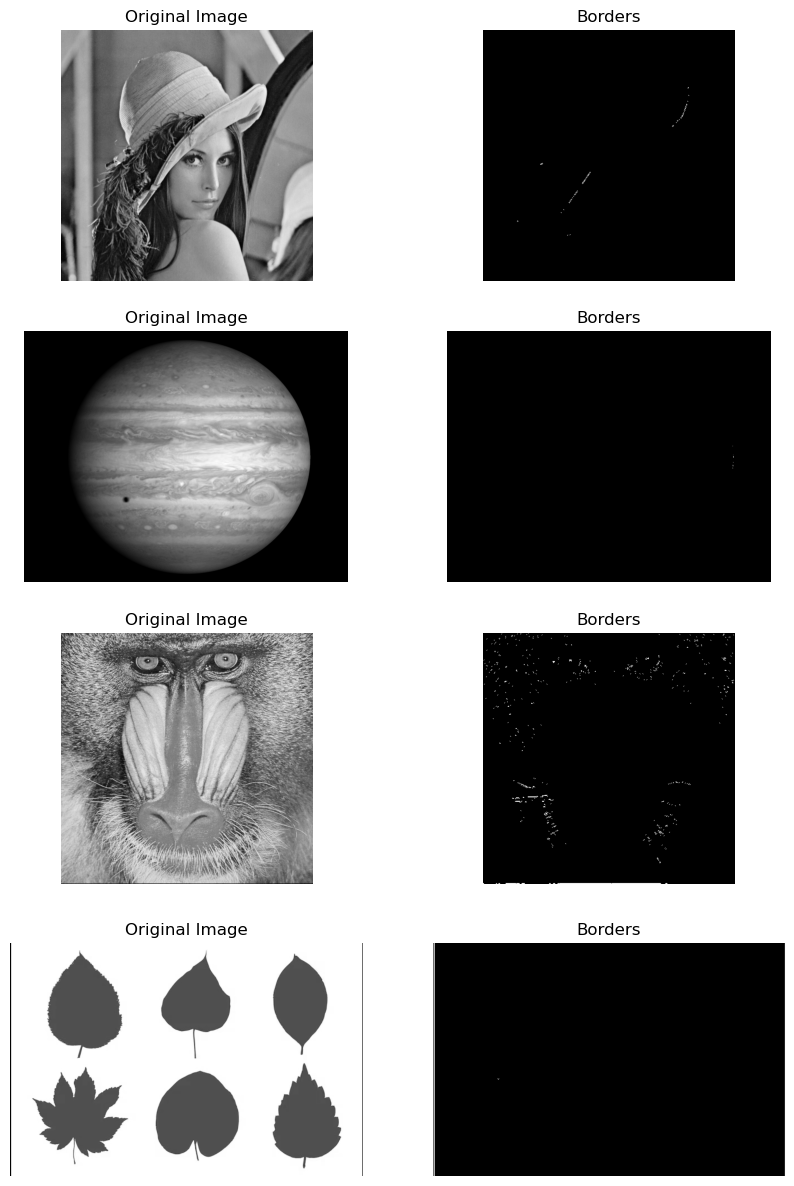

In [20]:
plt.figure(figsize=(10, 15))
plt.subplot(4, 2, 1)
plt.title('Original Image')
plt.imshow(lenna, cmap='gray')
plt.axis('off')
plt.subplot(4, 2, 2)
plt.title('Borders')
plt.imshow(border_lenna, cmap='gray')
plt.axis('off')
plt.savefig("bordas.jpg")
plt.subplot(4, 2, 3)
plt.title('Original Image')
plt.imshow(jupiter, cmap='gray')
plt.axis('off')
plt.subplot(4, 2, 4)
plt.title('Borders')
plt.imshow(border_jupiter, cmap='gray')
plt.axis('off')
plt.savefig("bordas.jpg")
plt.subplot(4, 2, 5)
plt.title('Original Image')
plt.imshow(baboon, cmap='gray')
plt.axis('off')
plt.subplot(4, 2, 6)
plt.title('Borders')
plt.imshow(border_baboon, cmap='gray')
plt.axis('off')
plt.subplot(4, 2, 7)
plt.title('Original Image')
plt.imshow(folhas, cmap='gray')
plt.axis('off')
plt.subplot(4, 2, 8)
plt.title('Borders')
plt.imshow(border_folhas, cmap='gray')
plt.axis('off')

plt.savefig("bordas.jpg")

plt.show()

## Testando outros thresholds

### Babuíno

In [21]:
Gb1 = create_graph_from_image(baboon)

edges = find_borders(Gb1,5)

border_baboon1 = np.zeros_like(baboon)
border_baboon1 = draw_borders(border_baboon1, edges)

In [22]:
Gb2 = create_graph_from_image(baboon)

edges = find_borders(Gb2,30)

border_baboon2 = np.zeros_like(baboon)
border_baboon2 = draw_borders(border_baboon2, edges)

In [23]:
Gb3 = create_graph_from_image(baboon)

edges = find_borders(Gb3,50)

border_baboon3 = np.zeros_like(baboon)
border_baboon3 = draw_borders(border_baboon3, edges)

In [24]:
Gb4 = create_graph_from_image(baboon)

edges = find_borders(Gb4,80)

border_baboon4 = np.zeros_like(baboon)
border_baboon4 = draw_borders(border_baboon4, edges)

In [25]:
Gb5 = create_graph_from_image(baboon)

edges = find_borders(Gb5,120)

border_baboon5 = np.zeros_like(baboon)
border_baboon5 = draw_borders(border_baboon5, edges)

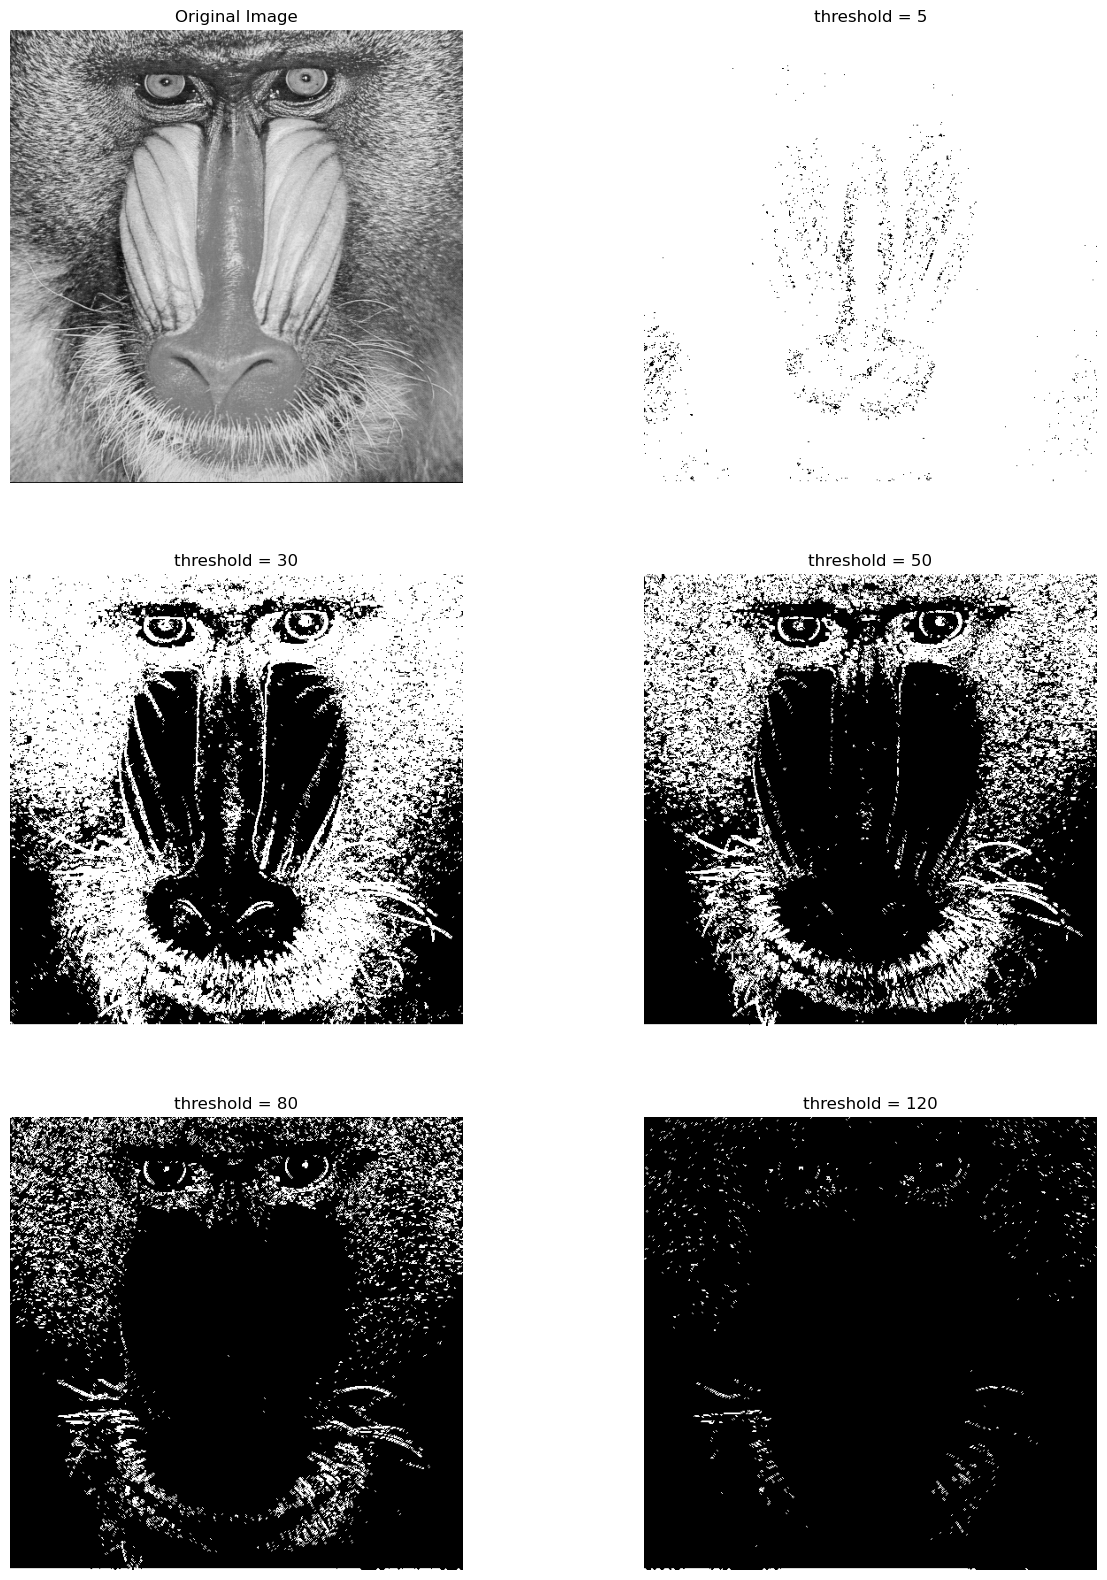

In [26]:
plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 1)
plt.title('Original Image')
plt.imshow(baboon, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 2)
plt.title('threshold = 5')
plt.imshow(border_baboon1, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 3)
plt.title('threshold = 30')
plt.imshow(border_baboon2, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 4)
plt.title('threshold = 50')
plt.imshow(border_baboon3, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 5)
plt.title('threshold = 80')
plt.imshow(border_baboon4, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 6)
plt.title('threshold = 120')
plt.imshow(border_baboon5, cmap='gray')
plt.axis('off')


plt.savefig("comparacao-threshold-baboon.jpg")

plt.show()

### Folhas

In [27]:
Gf1 = create_graph_from_image(folhas)

edges = find_borders(Gf1,5)

border_folhas1 = np.zeros_like(folhas)
border_folhas1 = draw_borders(border_folhas1, edges)

In [28]:
Gf2 = create_graph_from_image(folhas)

edges = find_borders(Gf2,30)

border_folhas2 = np.zeros_like(folhas)
border_folhas2 = draw_borders(border_folhas2, edges)

In [29]:
Gf3 = create_graph_from_image(folhas)

edges = find_borders(Gf3,50)

border_folhas3 = np.zeros_like(folhas)
border_folhas3 = draw_borders(border_folhas3, edges)

In [30]:
Gf4 = create_graph_from_image(folhas)

edges = find_borders(Gf4,80)

border_folhas4 = np.zeros_like(folhas)
border_folhas4 = draw_borders(border_folhas4, edges)

In [31]:
Gf5 = create_graph_from_image(folhas)

edges = find_borders(Gf5,120)

border_folhas5 = np.zeros_like(folhas)
border_folhas5 = draw_borders(border_folhas5, edges)

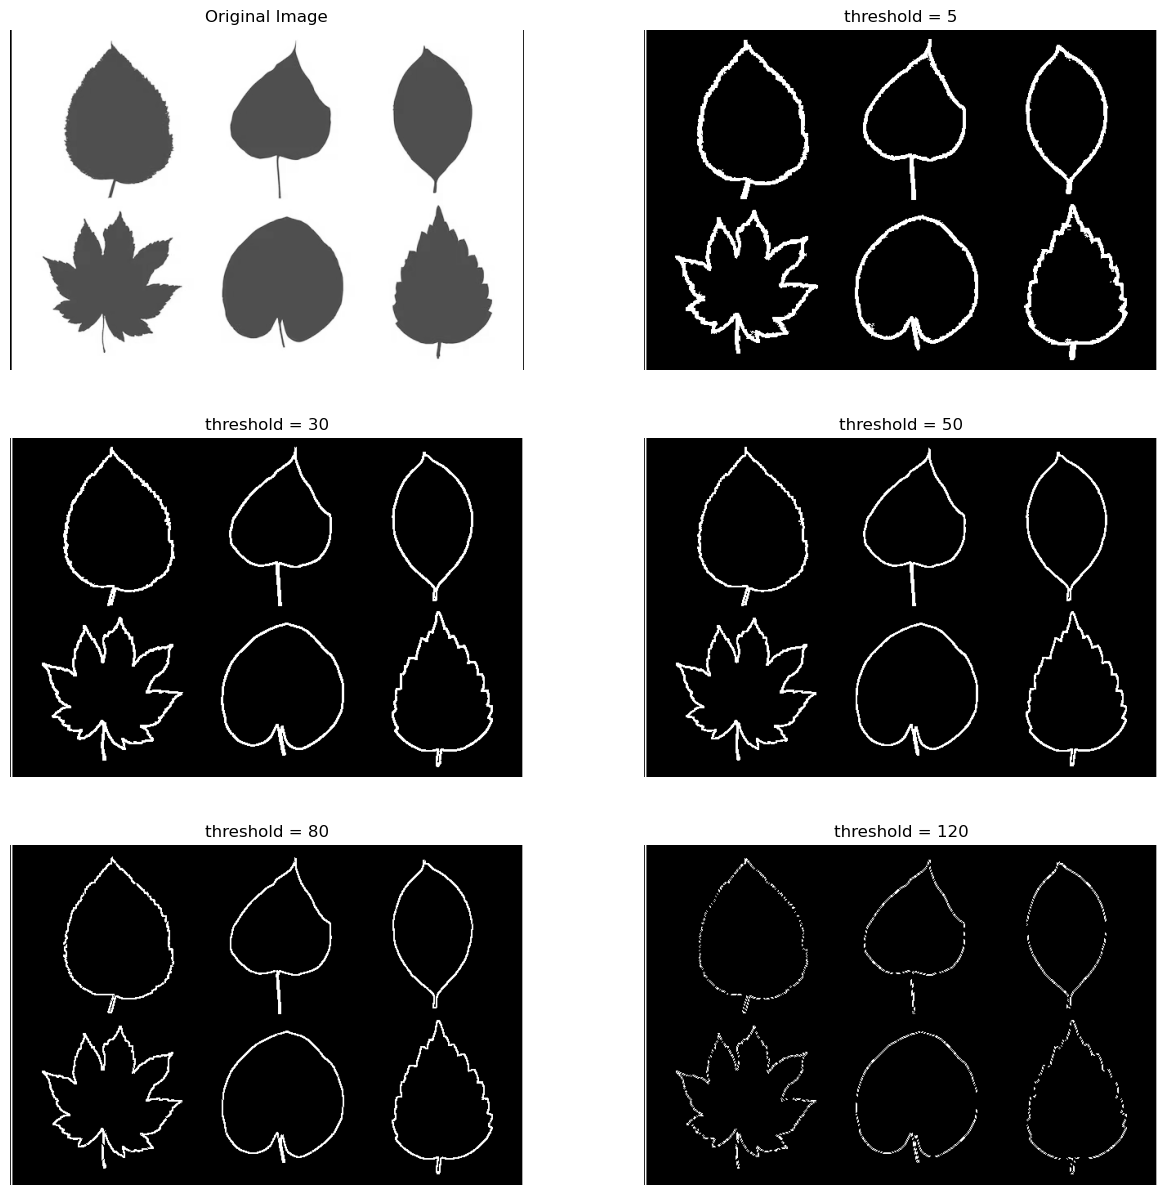

In [32]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
plt.title('Original Image')
plt.imshow(folhas, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 2)
plt.title('threshold = 5')
plt.imshow(border_folhas1, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 3)
plt.title('threshold = 30')
plt.imshow(border_folhas2, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 4)
plt.title('threshold = 50')
plt.imshow(border_folhas3, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 5)
plt.title('threshold = 80')
plt.imshow(border_folhas4, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 6)
plt.title('threshold = 120')
plt.imshow(border_folhas5, cmap='gray')
plt.axis('off')


plt.savefig("comparacao-threshold-folhas.jpg")

plt.show()

### Câmera de segurança

In [33]:
Gr1 = create_graph_from_image(roubo)

edges = find_borders(Gr1,5)

border_roubo1 = np.zeros_like(roubo)
border_roubo1 = draw_borders(border_roubo1, edges)

In [34]:
Gr2 = create_graph_from_image(roubo)

edges = find_borders(Gr2,30)

border_roubo2 = np.zeros_like(roubo)
border_roubo2 = draw_borders(border_roubo2, edges)

In [35]:
Gr3 = create_graph_from_image(roubo)

edges = find_borders(Gr3,50)

border_roubo3 = np.zeros_like(roubo)
border_roubo3 = draw_borders(border_roubo3, edges)

In [36]:
Gr4 = create_graph_from_image(roubo)

edges = find_borders(Gr4,80)

border_roubo4 = np.zeros_like(roubo)
border_roubo4 = draw_borders(border_roubo4, edges)

In [37]:
Gr5 = create_graph_from_image(roubo)

edges = find_borders(Gr5,120)

border_roubo5 = np.zeros_like(roubo)
border_roubo5 = draw_borders(border_roubo5, edges)

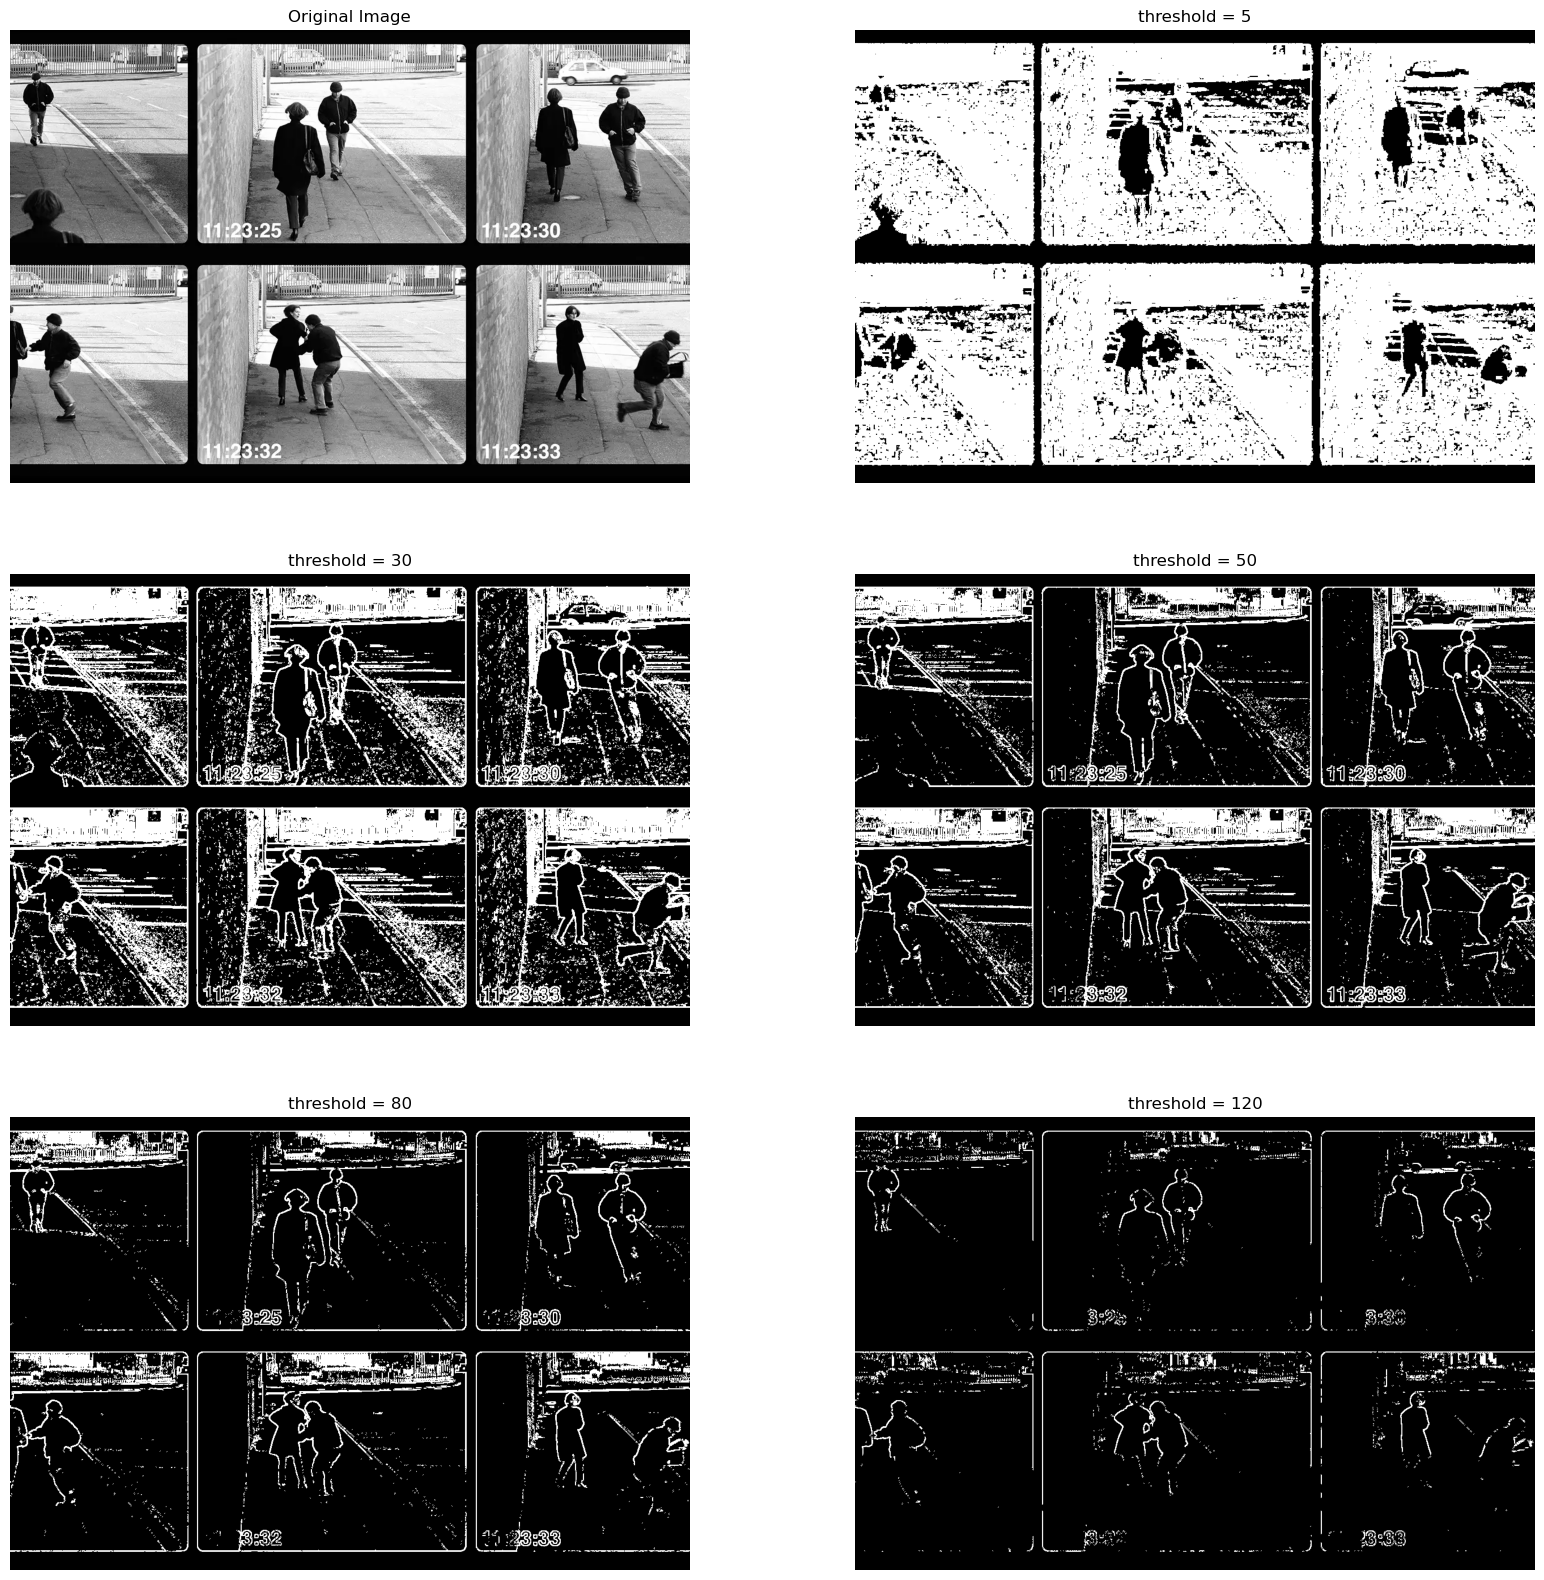

In [38]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title('Original Image')
plt.imshow(roubo, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 2)
plt.title('threshold = 5')
plt.imshow(border_roubo1, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 3)
plt.title('threshold = 30')
plt.imshow(border_roubo2, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 4)
plt.title('threshold = 50')
plt.imshow(border_roubo3, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 5)
plt.title('threshold = 80')
plt.imshow(border_roubo4, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 6)
plt.title('threshold = 120')
plt.imshow(border_roubo5, cmap='gray')
plt.axis('off')


plt.savefig("comparacao-threshold-roubo.jpg")

plt.show()

# Tentativa de contorno em cores

## Primeiro criamos um gerador de borda com outra cor de borda

In [39]:
def draw_borders(image, edges, color):
    for (u, v) in edges:
        image[u] = color
        image[v] = color
    return image

In [40]:
channels = cv2.split(folhas_cor)
border_images = []

for channel in channels:
    G = create_graph_from_image(channel)
    edges = find_borders(G,30)

    border_image = channel
    border_image = draw_borders(border_image, edges,0)
    border_images.append(border_image)

folhas_combined_borders = cv2.merge(border_images)


In [46]:
channels = cv2.split(folhinha_cor)
border_images = []
original_channels = []

for channel in channels:
    original_channels.append(channel)

for channel in channels:
    G = create_graph_from_image(channel)
    edges = find_borders(G,30)
    
    border_image = channel
    border_image = draw_borders(border_image, edges,0)
    border_images.append(border_image)


In [47]:
folhinha_verm = original_channels[0]
folhinha_verd = original_channels[1]
folhinha_azul = original_channels[2]

In [48]:
folhinha_borda_verm = border_images[0]
folhinha_borda_verd = border_images[1]
folhinha_borda_azul = border_images[2]
folhinha_combined_borders = cv2.merge(border_images)

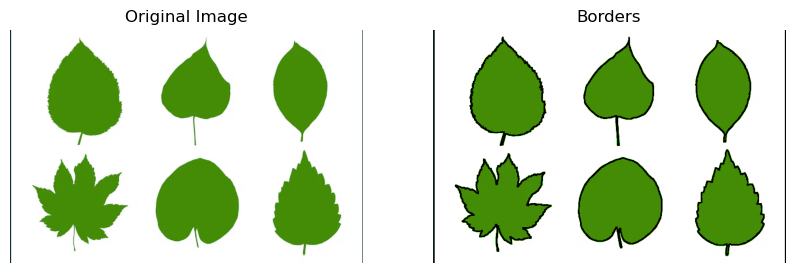

In [49]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(folhas_cor, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Borders')
plt.imshow(cv2.cvtColor(folhas_combined_borders, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

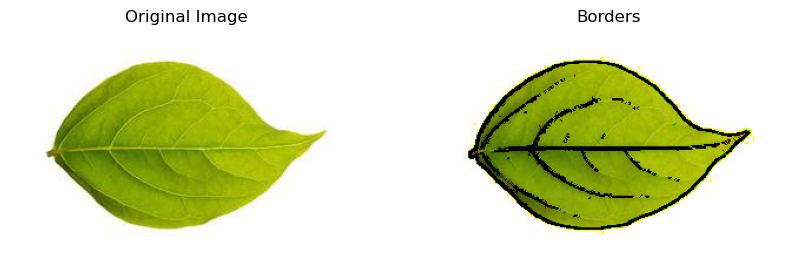

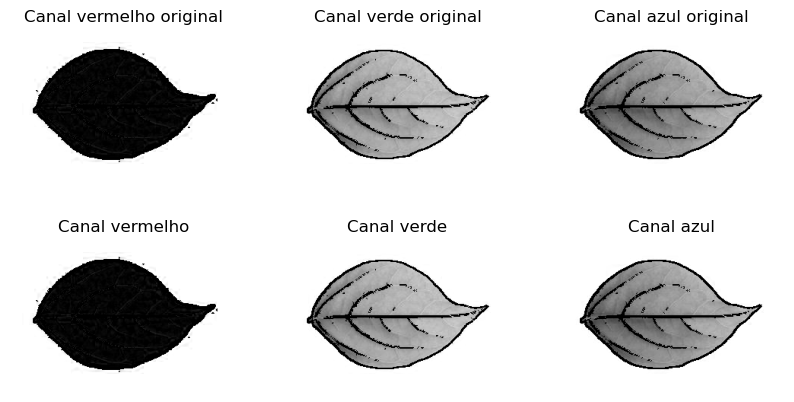

In [51]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(folhinha_cor, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Borders')
plt.imshow(cv2.cvtColor(folhinha_combined_borders, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.title('Canal vermelho original')
plt.imshow(folhinha_verm, cmap='gray')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.title('Canal verde original')
plt.imshow(folhinha_verd, cmap='gray')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.title('Canal azul original')
plt.imshow(folhinha_azul, cmap='gray')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.title('Canal vermelho')
plt.imshow(folhinha_borda_verm, cmap='gray')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.title('Canal verde')
plt.imshow(folhinha_borda_verd, cmap='gray')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.title('Canal azul')
plt.imshow(folhinha_borda_azul, cmap='gray')
plt.axis('off')
plt.show()
